In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.9720, -0.6365]) 
label: tensor([4.4291])


In [6]:
features, features.shape

(tensor([[-0.9720, -0.6365],
         [ 0.9037,  1.8822],
         [-0.8599, -0.4798],
         ...,
         [ 0.8841,  0.7843],
         [ 1.3093, -0.3649],
         [-0.7582, -1.6077]]),
 torch.Size([1000, 2]))

In [7]:
labels, labels.shape

(tensor([[ 4.4291e+00],
         [-3.9341e-01],
         [ 4.1015e+00],
         [ 1.2844e+01],
         [ 6.2188e+00],
         [ 2.2130e+00],
         [ 4.3561e+00],
         [ 7.3029e+00],
         [ 2.3898e+00],
         [-5.4266e-01],
         [ 3.0412e+00],
         [ 9.9702e+00],
         [ 9.4444e-01],
         [ 1.5133e+00],
         [ 5.6599e+00],
         [ 5.2243e+00],
         [ 9.7600e+00],
         [-2.6986e+00],
         [ 1.0132e+01],
         [ 7.8125e+00],
         [ 6.4771e+00],
         [ 4.0507e+00],
         [ 5.8103e+00],
         [ 1.2545e+00],
         [ 8.7923e+00],
         [ 5.7619e+00],
         [ 9.5808e+00],
         [-3.1076e+00],
         [ 1.0336e+01],
         [ 1.2126e+01],
         [-1.0808e+00],
         [ 6.4395e+00],
         [ 8.2990e+00],
         [ 6.7977e+00],
         [ 3.8571e+00],
         [ 8.9351e+00],
         [ 2.8863e+00],
         [ 5.7942e+00],
         [ 2.0105e+00],
         [ 7.4410e+00],
         [ 4.0633e+00],
         [-1.088

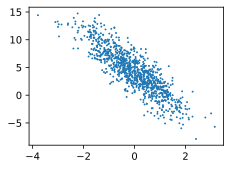

In [8]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),labels.detach().numpy(), 1)

In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

In [12]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.4184e+00, -7.1598e-02],
        [ 7.6744e-01,  5.6896e-01],
        [ 1.0813e-01, -2.0624e-01],
        [-2.9484e-01,  3.1671e-01],
        [-1.6807e-04,  1.2694e+00],
        [-3.6578e-01, -5.3885e-01],
        [-9.7201e-01, -6.3652e-01],
        [-1.9776e-01, -1.3453e+00],
        [ 2.3752e-01,  1.4087e+00],
        [-6.1976e-01,  9.6657e-01]]) 
 tensor([[ 1.6041],
        [ 3.7837],
        [ 5.0961],
        [ 2.5200],
        [-0.0965],
        [ 5.2988],
        [ 4.4291],
        [ 8.3844],
        [-0.1086],
        [-0.3259]])


In [13]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [14]:
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [15]:
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [16]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [17]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [18]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):.9f}')
        

epoch 1, loss 0.031610813
epoch 2, loss 0.000120638
epoch 3, loss 0.000053746


In [19]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([0.0002, 0.0005], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0012], grad_fn=<RsubBackward1>)
